In [1]:
import pandas as pd
import seaborn as sns
import glob
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec

In [2]:
data_2021 = glob.glob('Source Files/2021 Data/*.csv')
data_2022 = glob.glob('Source Files/2022 Data/*.csv')
data_2023 = glob.glob('Source Files/2023 Data/*.csv')


In [3]:
fact_data = []

for file in data_2021:
    df = pd.read_csv(file, sep = '\t')
    fact_data.append(df)

for file in data_2022:
    df = pd.read_csv(file, sep = '\t')
    fact_data.append(df)

for file in data_2023:
    df = pd.read_csv(file, sep = '\t')
    fact_data.append(df)


In [4]:
fact_data = pd.concat(fact_data, ignore_index = True)

In [5]:
fact_data.head()

,Date,TransactionID,FarmID,CropType,Quantity,PricePerTon,TotalValue
0,2021-01-25,TRANS723673,21,Wheat,573.761459,454.603628,260834.040635
1,2021-01-15,TRANS187551,9,Soybean,451.441845,186.151194,84036.438237
2,2021-01-03,TRANS428533,47,Rice,481.131771,225.699731,108591.311284
3,2021-01-23,TRANS179471,43,Corn,902.957063,363.556101,328275.549269
4,2021-01-10,TRANS660612,18,Soybean,450.796065,227.064752,102359.896511


In [6]:
crops = pd.read_csv('Source Files/crops_lookup.csv', sep = '\t')
farms = pd.read_csv('Source Files/farms_lookup.csv', sep = '\t')
suppliers = pd.read_csv('Source Files/suppliers_lookup.csv', sep = '\t')
crops.head()

,CropType,GrowingSeason,AverageYieldPerAcre
0,Wheat,Winter,3.745350
1,Corn,Summer,3.419063
2,Soybean,Summer,3.051549
3,Rice,Spring,3.693095


In [7]:
fact_data = pd.merge(fact_data, crops, on = 'CropType', how = 'left')
fact_data = pd.merge(fact_data, farms, on = 'FarmID', how = 'left')


In [8]:
fact_data.head()

,Date,TransactionID,FarmID,CropType,Quantity,PricePerTon,TotalValue,GrowingSeason,AverageYieldPerAcre,FarmName,Location,OwnerName,SizeAcres
0,2021-01-25,TRANS723673,21,Wheat,573.761459,454.603628,260834.040635,Winter,3.745350,"Rojas, Curry and Rogers",Pamelamouth,Christian Cox,568.021006
1,2021-01-15,TRANS187551,9,Soybean,451.441845,186.151194,84036.438237,Summer,3.051549,Perez-Brewer,Lake Tiffanyville,Terri Sosa,956.026018
2,2021-01-03,TRANS428533,47,Rice,481.131771,225.699731,108591.311284,Spring,3.693095,"Hatfield, Carson and Ross",Christinachester,Donna Sanchez,765.080664
3,2021-01-23,TRANS179471,43,Corn,902.957063,363.556101,328275.549269,Summer,3.419063,"Jones, Juarez and Gutierrez",North Dakota,James Blackwell,964.194247
4,2021-01-10,TRANS660612,18,Soybean,450.796065,227.064752,102359.896511,Summer,3.051549,"Yang, Mccall and Green",East Rhonda,Ryan Hayes,918.755663


In [9]:
fact_data.duplicated().sum()

0

In [10]:
fact_data.dtypes

Date                    object
TransactionID           object
FarmID                   int64
CropType                object
Quantity               float64
PricePerTon            float64
TotalValue             float64
GrowingSeason           object
AverageYieldPerAcre    float64
FarmName                object
Location                object
OwnerName               object
SizeAcres              float64
dtype: object

In [11]:
fact_data.columns

Index(['Date', 'TransactionID', 'FarmID', 'CropType', 'Quantity',
       'PricePerTon', 'TotalValue', 'GrowingSeason', 'AverageYieldPerAcre',
       'FarmName', 'Location', 'OwnerName', 'SizeAcres'],
      dtype='object')

In [12]:
#fact_data.drop(fact_data[['FarmID', 'GrowingSeason_y', 'AverageYieldPerAcre_y', 'FarmName_y', 'Location_y', 'OwnerName_y', 'SizeAcres_y']], axis = 1, inplace = True)

In [13]:
fact_data['Date'] = pd.to_datetime(fact_data['Date'],errors='coerce')

In [14]:
fact_data.dtypes

Date                   datetime64[ns]
TransactionID                  object
FarmID                          int64
CropType                       object
Quantity                      float64
PricePerTon                   float64
TotalValue                    float64
GrowingSeason                  object
AverageYieldPerAcre           float64
FarmName                       object
Location                       object
OwnerName                      object
SizeAcres                     float64
dtype: object

In [15]:
fact_data.rename(columns={'GrowingSeason_x': 'GrowingSeason', 'AverageYieldPerAcre_x': 'AverageYieldPerAcre', 'FarmName_x': 'FarmName', 'Location_x': 'Location', 'OwnerName_x': 'OwnerName', 'SizeAcres_x': 'SizeAcres'}, inplace = True)

In [16]:
fact_data.head(3)

,Date,TransactionID,FarmID,CropType,Quantity,PricePerTon,TotalValue,GrowingSeason,AverageYieldPerAcre,FarmName,Location,OwnerName,SizeAcres
0,2021-01-25,TRANS723673,21,Wheat,573.761459,454.603628,260834.040635,Winter,3.745350,"Rojas, Curry and Rogers",Pamelamouth,Christian Cox,568.021006
1,2021-01-15,TRANS187551,9,Soybean,451.441845,186.151194,84036.438237,Summer,3.051549,Perez-Brewer,Lake Tiffanyville,Terri Sosa,956.026018
2,2021-01-03,TRANS428533,47,Rice,481.131771,225.699731,108591.311284,Spring,3.693095,"Hatfield, Carson and Ross",Christinachester,Donna Sanchez,765.080664


In [17]:
fact_data.dtypes

Date                   datetime64[ns]
TransactionID                  object
FarmID                          int64
CropType                       object
Quantity                      float64
PricePerTon                   float64
TotalValue                    float64
GrowingSeason                  object
AverageYieldPerAcre           float64
FarmName                       object
Location                       object
OwnerName                      object
SizeAcres                     float64
dtype: object

In [18]:
fact_data['Year'] = fact_data['Date'].dt.year.astype(str)
fact_data['Quarter'] = fact_data['Date'].dt.quarter.astype(str)
fact_data['Month'] = fact_data['Date'].dt.strftime('%b')

In [19]:
fact_data.dtypes

Date                   datetime64[ns]
TransactionID                  object
FarmID                          int64
CropType                       object
Quantity                      float64
PricePerTon                   float64
TotalValue                    float64
GrowingSeason                  object
AverageYieldPerAcre           float64
FarmName                       object
Location                       object
OwnerName                      object
SizeAcres                     float64
Year                           object
Quarter                        object
Month                          object
dtype: object

In [20]:
fact_data.head(2)

,Date,TransactionID,FarmID,CropType,Quantity,PricePerTon,TotalValue,GrowingSeason,AverageYieldPerAcre,FarmName,Location,OwnerName,SizeAcres,Year,Quarter,Month
0,2021-01-25,TRANS723673,21,Wheat,573.761459,454.603628,260834.040635,Winter,3.745350,"Rojas, Curry and Rogers",Pamelamouth,Christian Cox,568.021006,2021,1,Jan
1,2021-01-15,TRANS187551,9,Soybean,451.441845,186.151194,84036.438237,Summer,3.051549,Perez-Brewer,Lake Tiffanyville,Terri Sosa,956.026018,2021,1,Jan


## Starting to create charts

### KPIs

In [21]:
Total_No_Of_Transactions = fact_data['TransactionID'].count()

In [22]:
print(f"{Total_No_Of_Transactions:,}")

3,600


In [23]:
Total_Revenue = fact_data['TotalValue'].sum()/1_000_000

In [24]:
print(f"{Total_Revenue:,.1f} M")

591.2 M


In [25]:
fact_data.head()

,Date,TransactionID,FarmID,CropType,Quantity,PricePerTon,TotalValue,GrowingSeason,AverageYieldPerAcre,FarmName,Location,OwnerName,SizeAcres,Year,Quarter,Month
0,2021-01-25,TRANS723673,21,Wheat,573.761459,454.603628,260834.040635,Winter,3.745350,"Rojas, Curry and Rogers",Pamelamouth,Christian Cox,568.021006,2021,1,Jan
1,2021-01-15,TRANS187551,9,Soybean,451.441845,186.151194,84036.438237,Summer,3.051549,Perez-Brewer,Lake Tiffanyville,Terri Sosa,956.026018,2021,1,Jan
2,2021-01-03,TRANS428533,47,Rice,481.131771,225.699731,108591.311284,Spring,3.693095,"Hatfield, Carson and Ross",Christinachester,Donna Sanchez,765.080664,2021,1,Jan
3,2021-01-23,TRANS179471,43,Corn,902.957063,363.556101,328275.549269,Summer,3.419063,"Jones, Juarez and Gutierrez",North Dakota,James Blackwell,964.194247,2021,1,Jan
4,2021-01-10,TRANS660612,18,Soybean,450.796065,227.064752,102359.896511,Summer,3.051549,"Yang, Mccall and Green",East Rhonda,Ryan Hayes,918.755663,2021,1,Jan


### Pivot Tables

In [26]:
# 1. Revenue by CropType
Revenue_by_CropType = fact_data.pivot_table(index = 'CropType', values = 'TotalValue', aggfunc = 'sum')
Revenue_by_CropType['TotalValue'] = Revenue_by_CropType['TotalValue'] / 1_000_000
Revenue_by_CropType.rename(columns = {'TotalValue': 'Revenue_in_M'}, inplace = True)

# 2. Qty Sold by CropType
Qty_Sold_by_CropType = fact_data.pivot_table(index = 'CropType', values = 'Quantity', aggfunc = 'sum')
Qty_Sold_by_CropType['Quantity'] = Qty_Sold_by_CropType['Quantity'] / 1_000
Qty_Sold_by_CropType.rename(columns = {'Quantity': 'Quantity_in_K'}, inplace = True)

# 3. Revenue by Farm
Revenue_by_Farm = fact_data.pivot_table(index = 'FarmName', values = 'TotalValue', aggfunc = 'sum')
Revenue_by_Farm['TotalValue'] = Revenue_by_Farm['TotalValue'] / 1_000_000
Revenue_by_Farm.rename(columns = {'TotalValue': 'Revenue_in_M'}, inplace = True)
sorted_rev_by_Farm = Revenue_by_Farm.sort_values(by = 'Revenue_in_M', ascending = False)
Revenue_by_Farm = sorted_rev_by_Farm.head(10)

# 4. AvgYieldPerAcre by Farm
Avg_Yield_Per_Acre_by_Farm = fact_data.pivot_table(index = 'FarmName', values = 'AverageYieldPerAcre', aggfunc = 'sum')
sorted_avg_yield_per_acre_by_farm = Avg_Yield_Per_Acre_by_Farm.sort_values(by = 'AverageYieldPerAcre', ascending = False)
Avg_Yield_Per_Acre_by_Farm = sorted_avg_yield_per_acre_by_farm.head(10)

# 5. Revenue Trend Over Time (Month)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Revenue_Trend_Over_Time = fact_data.groupby(['Month','Year'])['TotalValue'].sum().reset_index()
Revenue_Trend_Over_Time['TotalValue'] = pd.to_numeric(Revenue_Trend_Over_Time['TotalValue']) / 1_000
Revenue_Trend_Over_Time.rename(columns = {'TotalValue': 'Revenue_in_K'}, inplace = True)
Revenue_Trend_Over_Time['Month'] = pd.Categorical(Revenue_Trend_Over_Time['Month'], categories = month_order)

# 6. Total Revenue by Quarter
Total_Revenue_by_Quarter = fact_data.pivot_table(index = 'Quarter', values = 'TotalValue', aggfunc = 'sum') / 1_000_000
Total_Revenue_by_Quarter.rename(columns = {'TotalValue': 'Revenue_in_M'}, inplace = True) 

# 7. Qty Sold by Month
Qty_Sold_by_Month = fact_data.groupby(['Month', 'Year'])['Quantity'].sum().reset_index()
Qty_Sold_by_Month['Quantity'] = pd.to_numeric(Qty_Sold_by_Month['Quantity']) / 1_000
Qty_Sold_by_Month.rename(columns = {'Quantity': 'Quantity_in_K'}, inplace = True)
Qty_Sold_by_Month['Month'] = pd.Categorical(Qty_Sold_by_Month['Month'], categories= month_order)

#Revenue_Trend_Over_Time.head()

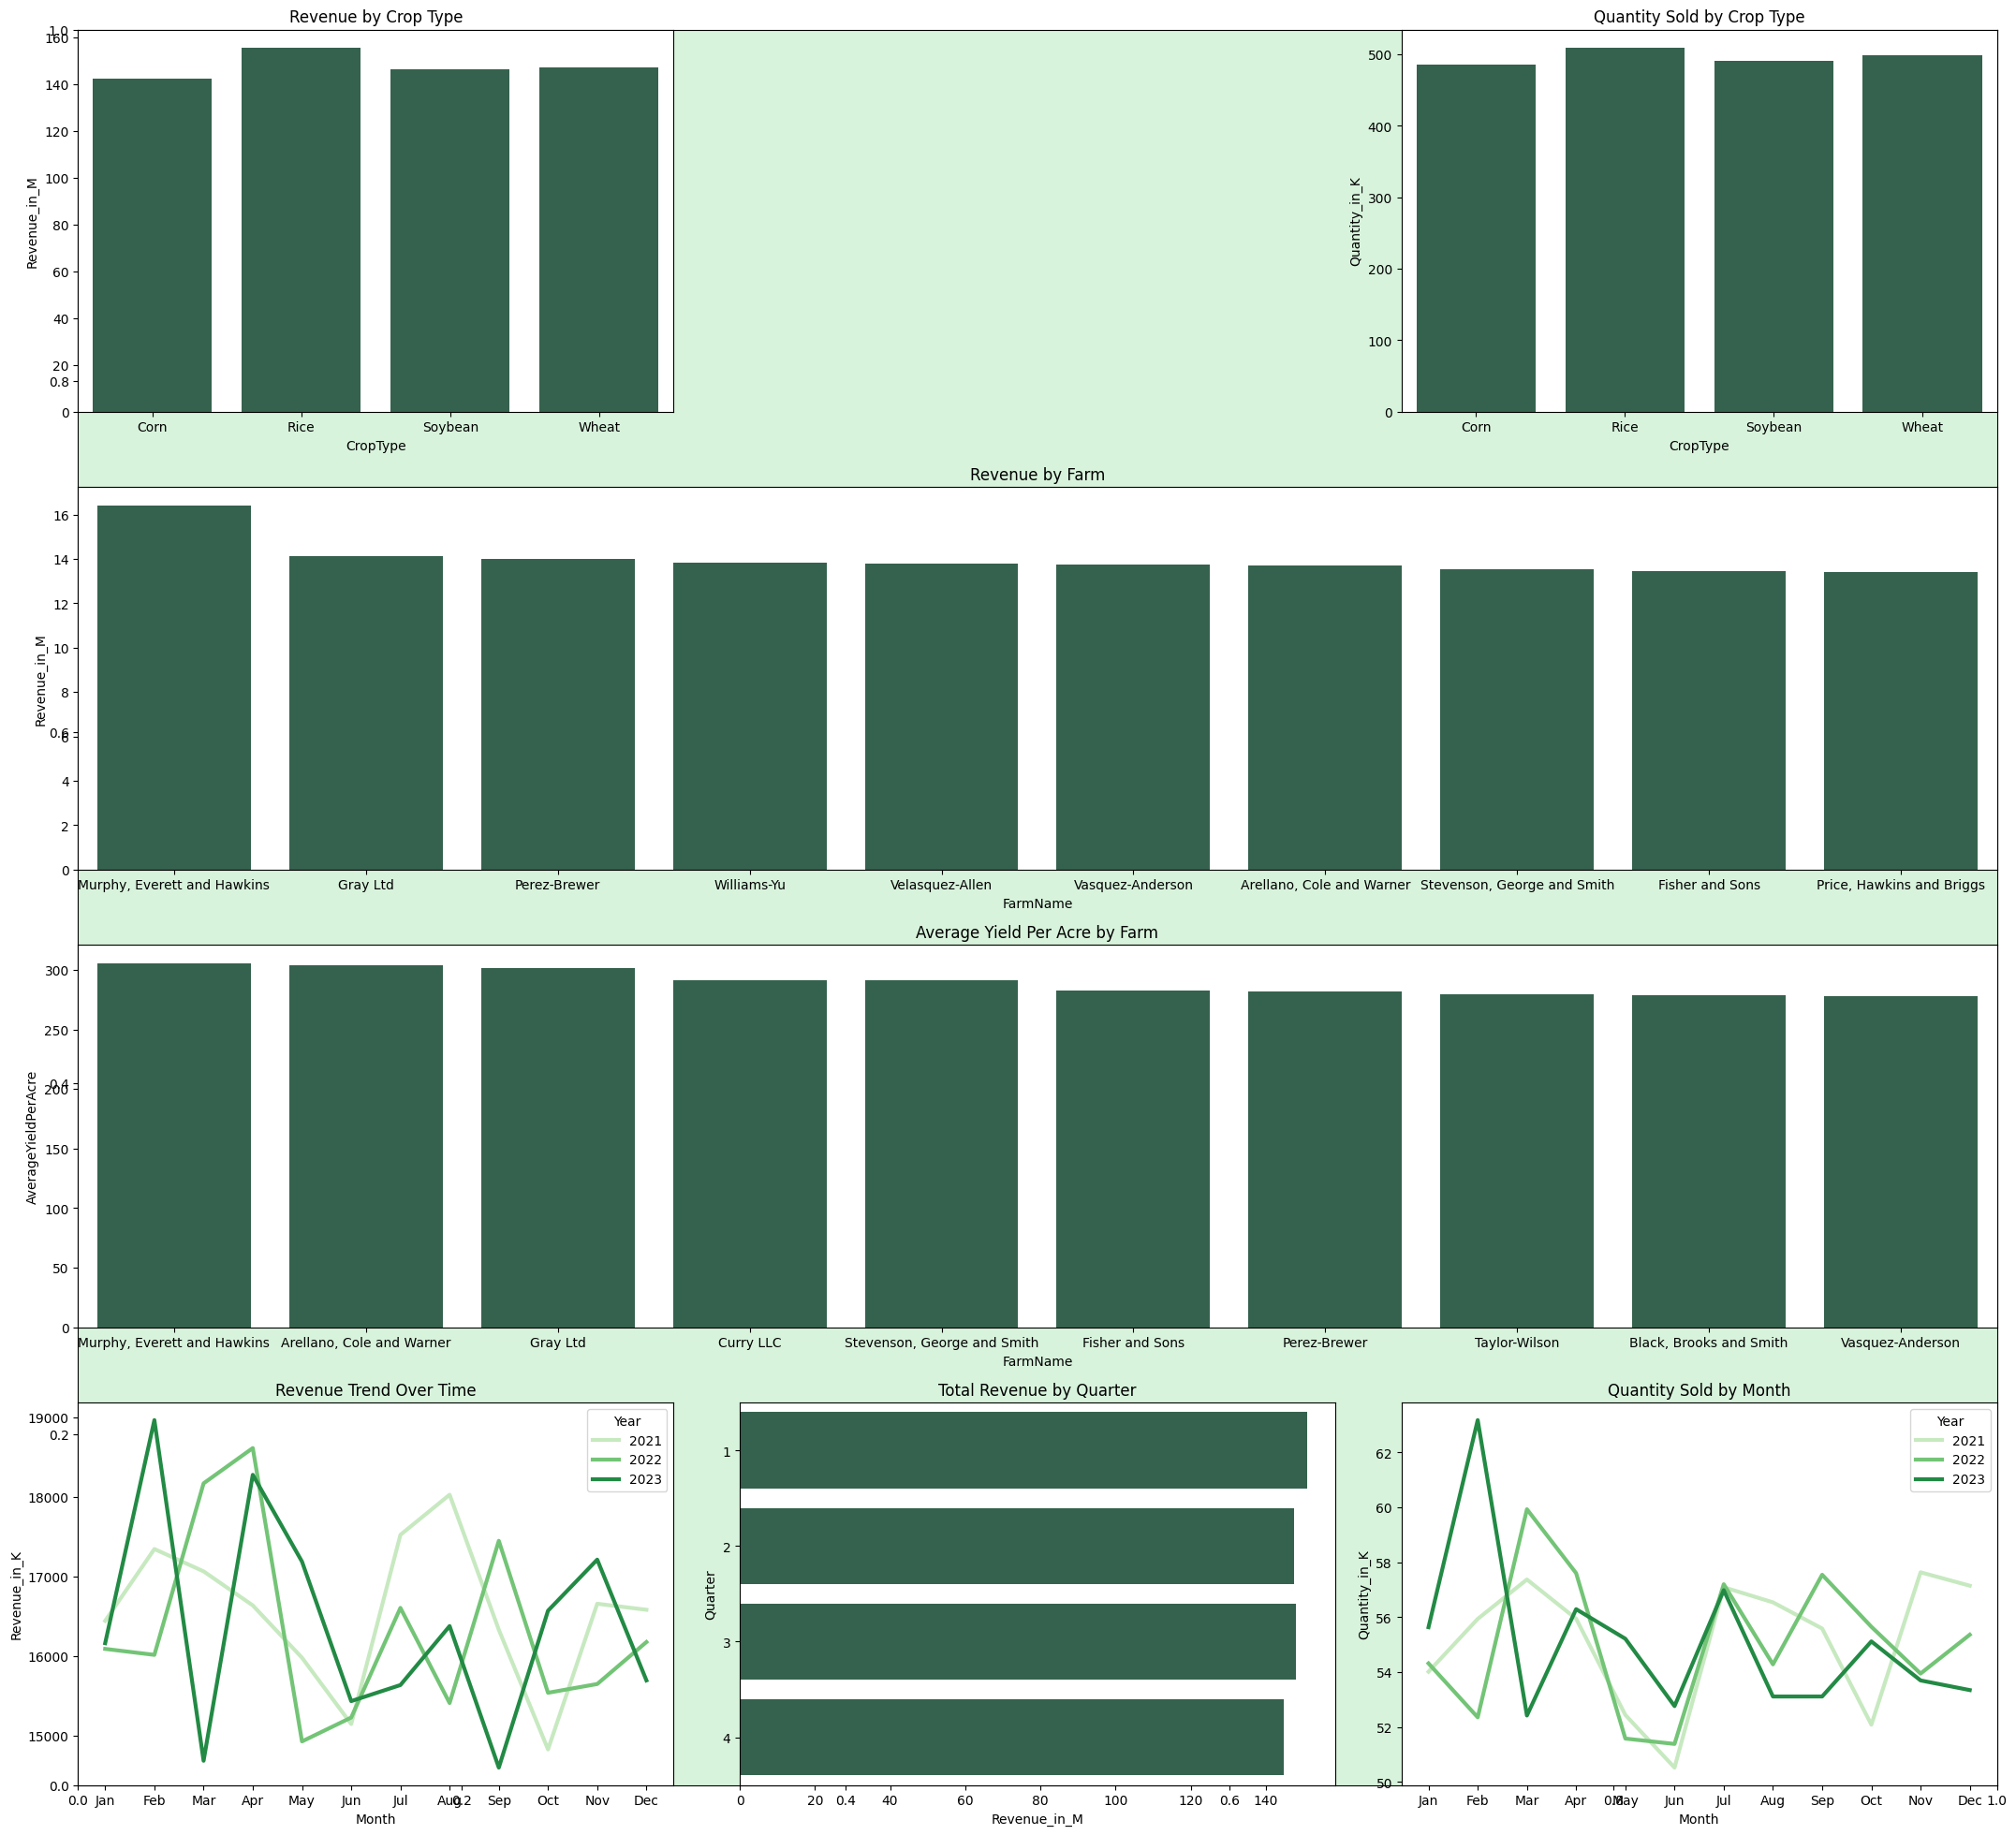

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axes
fig = plt.figure(figsize = (22,20))
gs = gridspec.GridSpec(4, 3, figure = fig)

plt.gca().set_facecolor('#d8f3dc')

# Plot 1: Revenue by Crop Type (Bar Plot) - First Row
ax1 = fig.add_subplot(gs[0,0])
sns.barplot(data=Revenue_by_CropType, x='CropType', y='Revenue_in_M', color='#2d6a4f', ax = ax1)
ax1.set_title('Revenue by Crop Type')

# Plot 2: Quantity Sold by Crop Type (Bar Plot) - First Row
ax1 = fig.add_subplot(gs[0,2])
sns.barplot(data=Qty_Sold_by_CropType, x='CropType', y='Quantity_in_K', color='#2d6a4f', ax = ax1)
ax1.set_title('Quantity Sold by Crop Type')

# Plot 3: Revenue by Farm (Bar Plot) - Second Row
ax2 = fig.add_subplot(gs[1,:])
sns.barplot(data=Revenue_by_Farm, x='FarmName', y='Revenue_in_M', color='#2d6a4f', ax = ax2)
ax2.set_title('Revenue by Farm')

# Plot 4: Average Yield Per Acre by Farm (Bar Plot) - Third Row
ax3 = fig.add_subplot(gs[2,:])
sns.barplot(data=Avg_Yield_Per_Acre_by_Farm, x='FarmName', y='AverageYieldPerAcre', color='#2d6a4f', ax = ax3)
ax3.set_title('Average Yield Per Acre by Farm')

# Plot 5: Revenue Trend Over Time (Line Plot) - Fourth Row, First Column
ax4 = fig.add_subplot(gs[3,0])
sns.lineplot(data=Revenue_Trend_Over_Time, x='Month', y='Revenue_in_K', hue='Year', palette='Greens', linewidth = 3, ax = ax4)
ax4.set_title('Revenue Trend Over Time')

# Plot 6: Total Revenue by Quarter (Bar Plot) - Fourth Row, Second Column
ax5 = fig.add_subplot(gs[3,1])
sns.barplot(data=Total_Revenue_by_Quarter, x='Revenue_in_M', y='Quarter', color='#2d6a4f', ax=ax5)
ax5.set_title('Total Revenue by Quarter')

# Plot 7: Quantity Sold by Month (Line Plot) - Fourth Row, Third Column
ax6 = fig.add_subplot(gs[3,2])
sns.lineplot(data=Qty_Sold_by_Month, x='Month', y='Quantity_in_K', hue='Year', palette ='Greens', linewidth = 3, ax=ax6)
ax6.set_title('Quantity Sold by Month')

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('my_plot.png')
plt.show()
